# Project 1: Random Graphs and Random Walks

## 1.Generating Random Networks 

### Question 1: Create random networks using ER model

#### (a)

In [167]:
library('igraph')
library('Matrix')
library('pracma')

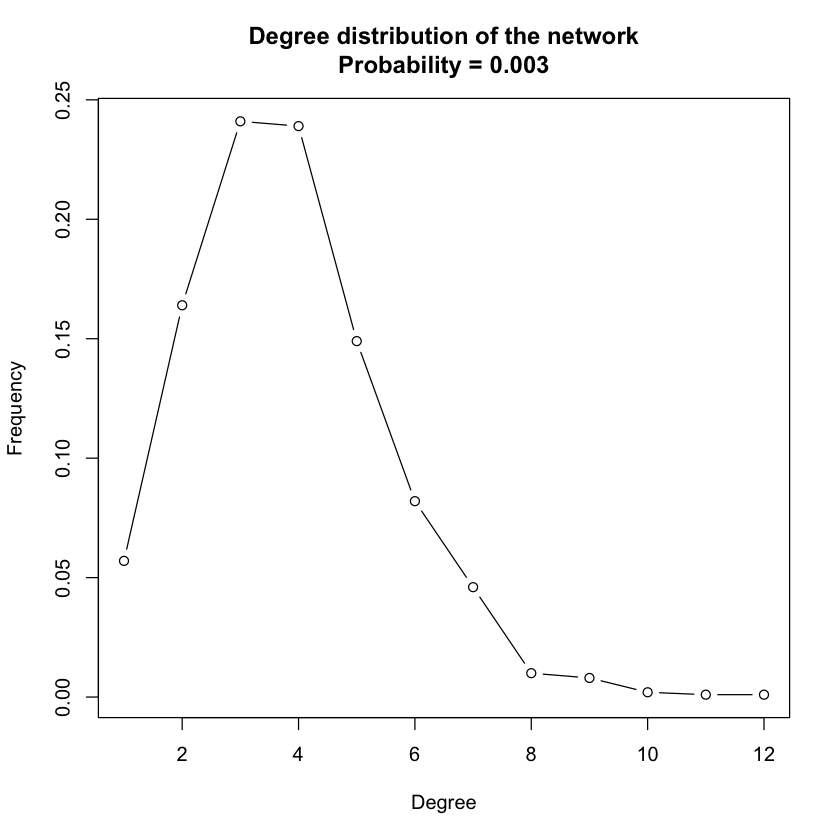

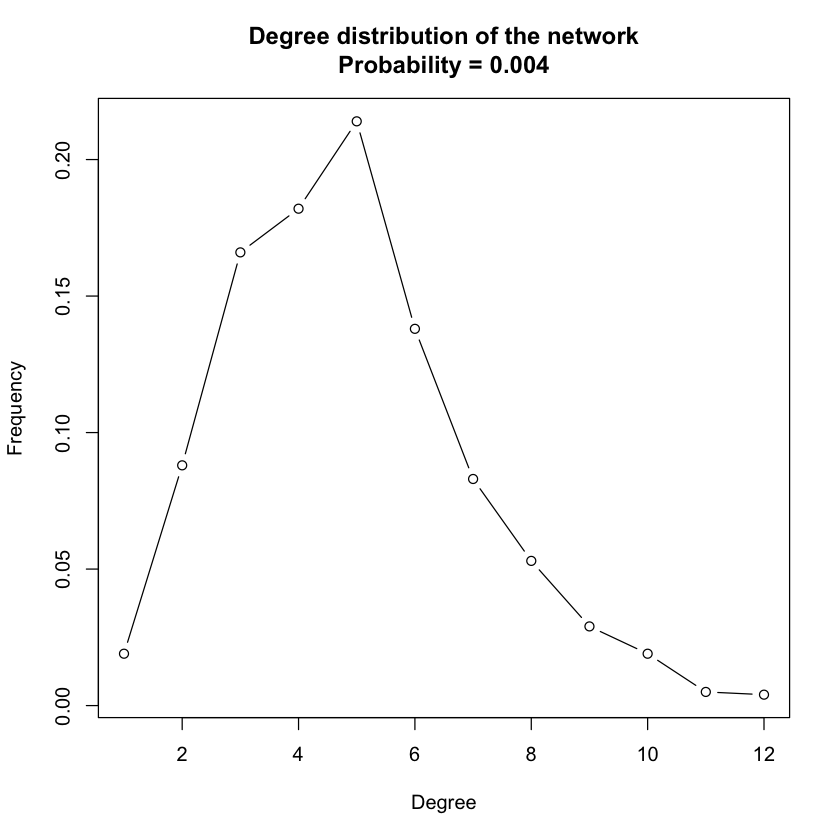

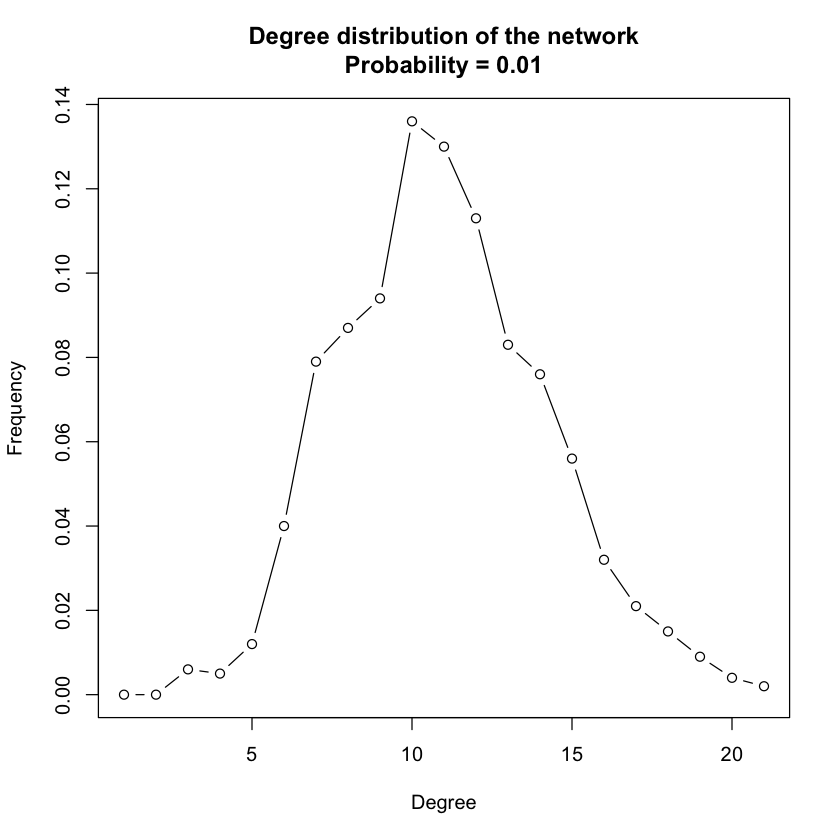

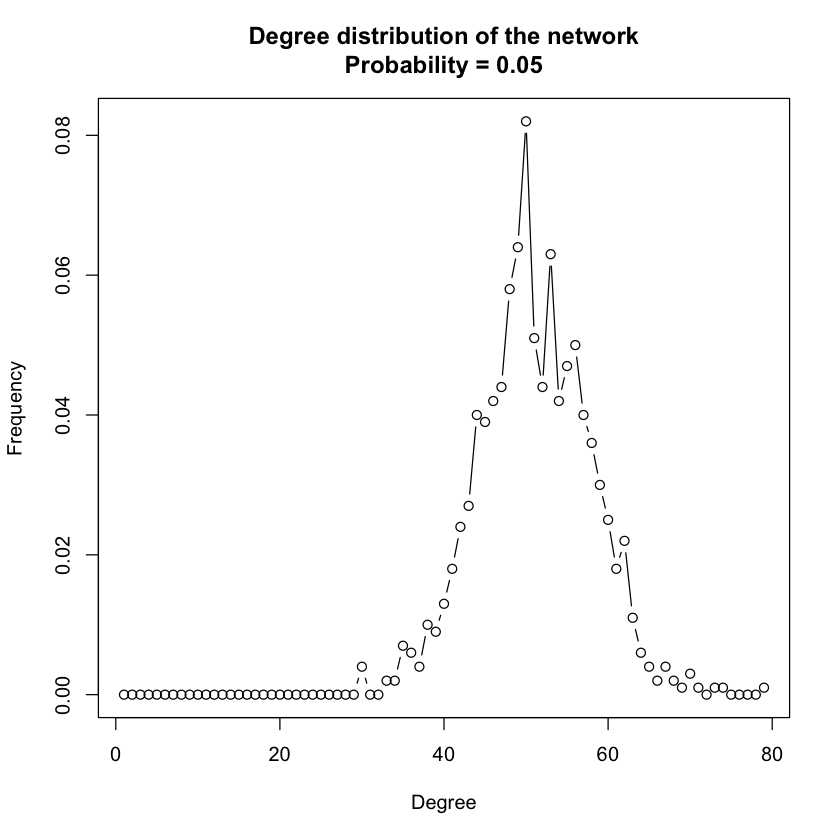

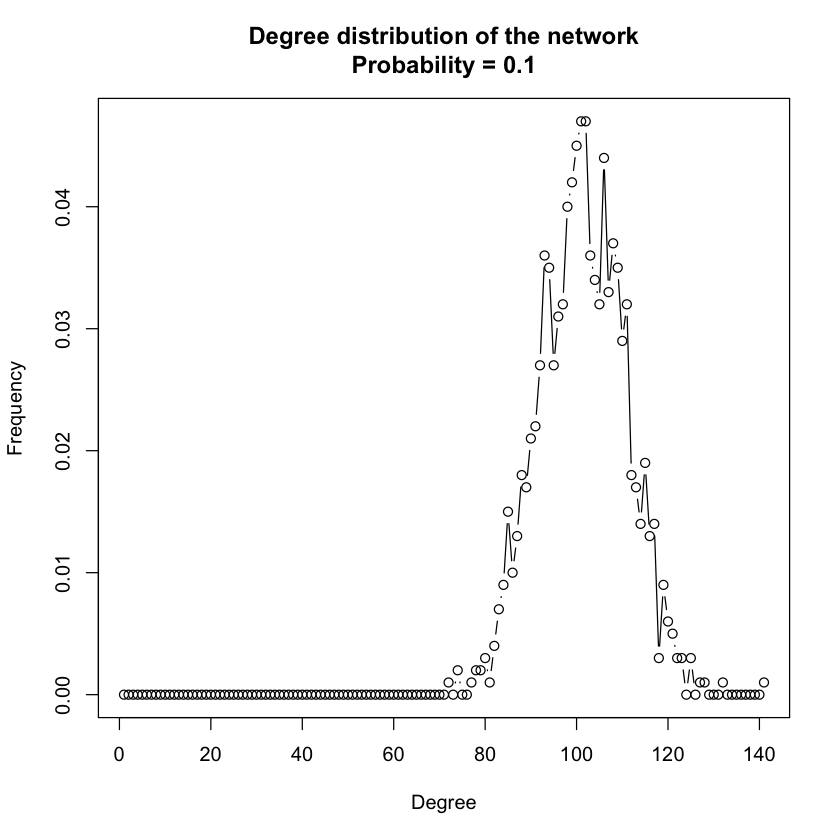

In [168]:
probs <- c(0.003, 0.004, 0.01, 0.05, 0.1)
means <- c()
vars <- c()
for (p in probs){
    g <- erdos.renyi.game(1000, p, directed = F)
    means <- c(means,mean(degree(g)))
    vars <- c(vars,var(degree(g)))
    plot(degree_distribution(g),type = 'b', main=paste("Degree distribution of the network\nProbability =",p),xlab="Degree",ylab="Frequency")    
}

In [172]:
for (count in 1:5){
    cat(paste("Graphs",count,'\n'))
    cat(paste("Mean of the degree distribution:",means[count],'\n'))
    cat(paste("Variance of the degree distribution:",vars[count],'\n'))
    cat('\n')
}

Graphs 1 
Mean of the degree distribution: 2.818 
Variance of the degree distribution: 2.81569169169169 

Graphs 2 
Mean of the degree distribution: 3.878 
Variance of the degree distribution: 4.19330930930931 

Graphs 3 
Mean of the degree distribution: 9.994 
Variance of the degree distribution: 10.04601001001 

Graphs 4 
Mean of the degree distribution: 49.986 
Variance of the degree distribution: 46.2961001001001 

Graphs 5 
Mean of the degree distribution: 100.342 
Variance of the degree distribution: 87.3563923923924 



#### (b)

In [173]:
probs <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for (p in 1:5){
    count <- 0
    for(i in 1:1000){
        g <- erdos.renyi.game(1000, probs[p], directed = F)
        if(is_connected(g)){
            count <- count + 1
        }
    }
    cat(paste("The probability that a generated network is connected for p =",probs[p],"is",count/1000,'\n'))
}


The probability that a generated network is connected for p = 0.003 is 0 
The probability that a generated network is connected for p = 0.004 is 0 
The probability that a generated network is connected for p = 0.01 is 0.956 
The probability that a generated network is connected for p = 0.05 is 1 
The probability that a generated network is connected for p = 0.1 is 1 


In [174]:
for (i in 1:5){
    g <- erdos.renyi.game(1000, probs[i], directed = F)
    subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
    cat(paste("Graph with probability",probs[i],'\n'))
    cat(paste("Is connected? ",is_connected(g),'\n'))
    cat(paste("The diameter of GCC is",diameter(subg),'\n\n'))
}

Graph with probability 0.003 
Is connected?  FALSE 
The diameter of GCC is 13 

Graph with probability 0.004 
Is connected?  FALSE 
The diameter of GCC is 11 

Graph with probability 0.01 
Is connected?  TRUE 
The diameter of GCC is 5 

Graph with probability 0.05 
Is connected?  TRUE 
The diameter of GCC is 3 

Graph with probability 0.1 
Is connected?  TRUE 
The diameter of GCC is 3 



#### (c)

The probability that a generated network is connected for p = 0.01 is 0.966 
The probability that a generated network is connected for p = 0.011 is 0.989 
The probability that a generated network is connected for p = 0.012 is 0.995 
The probability that a generated network is connected for p = 0.013 is 0.999 
The probability that a generated network is connected for p = 0.014 is 0.999 
The probability that a generated network is connected for p = 0.015 is 1 
The probability that a generated network is connected for p = 0.016 is 1 
The probability that a generated network is connected for p = 0.017 is 1 
The probability that a generated network is connected for p = 0.018 is 1 
The probability that a generated network is connected for p = 0.019 is 1 
The probability that a generated network is connected for p = 0.02 is 1 


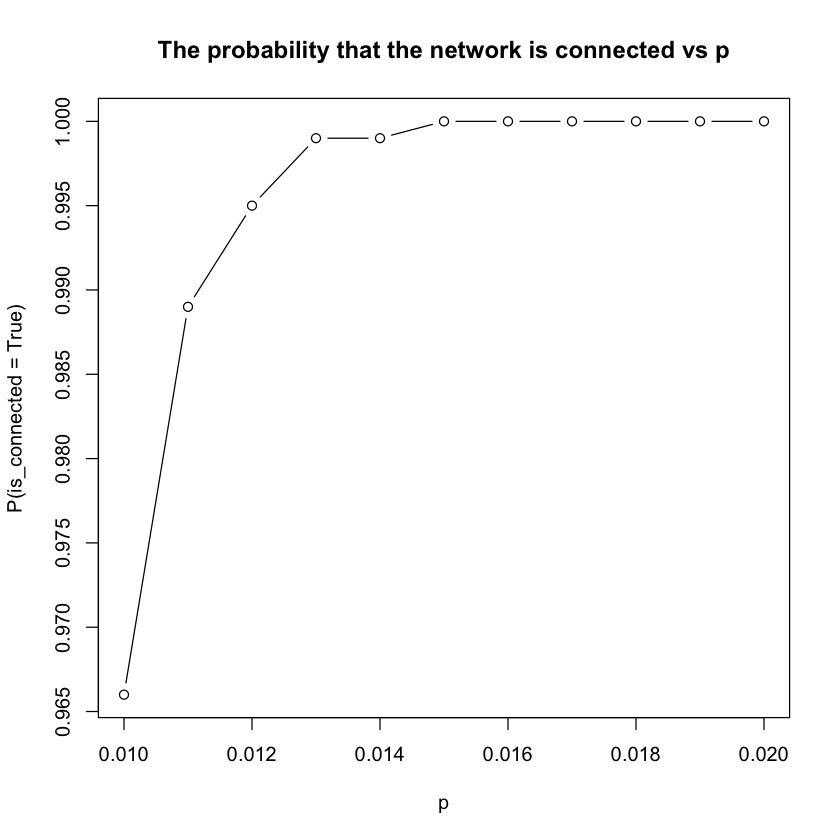

In [176]:
probs <- c(0.01, 0.011, 0.012, 0.013, 0.014,0.015,0.016,0.017,0.018,0.019,0.02)
p_connected <- c()
for (p in 1:length(probs)){
    count <- 0
    for(i in 1:1000){
        g <- erdos.renyi.game(1000, probs[p], directed = F)
        if(is_connected(g)){
            count <- count + 1
        }
    }
    p_connected <- c(p_connected,count/1000)
    cat(paste("The probability that a generated network is connected for p =",probs[p],"is",count/1000,'\n'))
}
plot(probs,p_connected,type='b',main="The probability that the network is connected vs p",xlab="p",ylab="P(is_connected = True)")

**p = 0.015 is enough for us to make the network almost surely connected.**

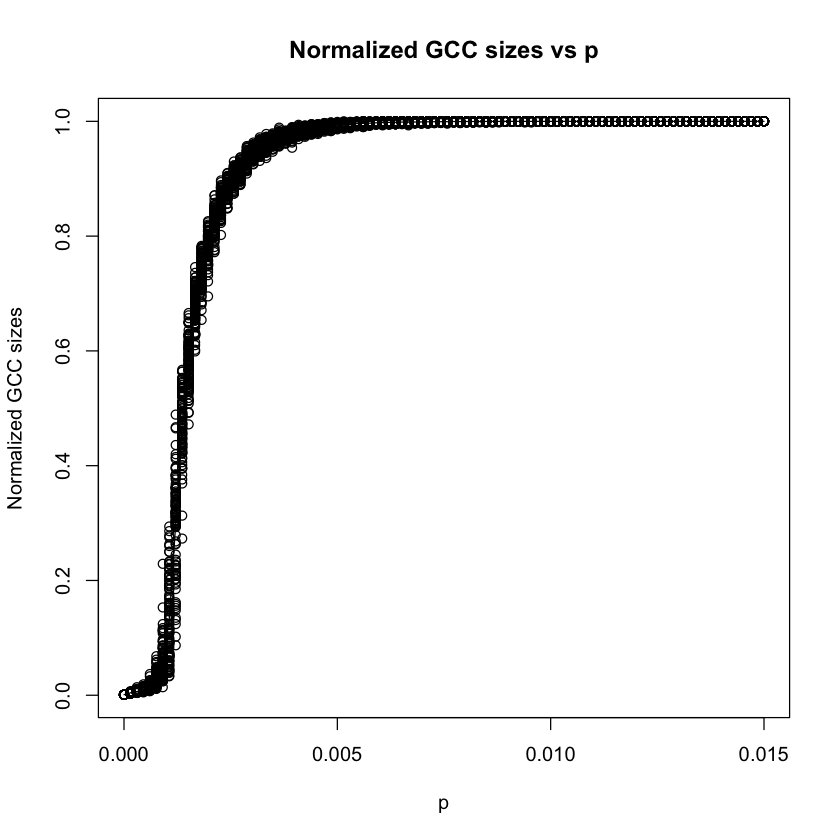

In [177]:
p_seq <- seq(from=0,to=0.015,length.out=100)
norm_gcc <- c()
avg_norm_gcc <- c()
for (p in p_seq){
    norm_gcc_p <- c()
    for (i in 1:100){
        g <- erdos.renyi.game(1000, p, directed = F)
        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
        norm_gcc_p <- c(norm_gcc_p,vcount(subg)/vcount(g))
    }
    norm_gcc <- c(norm_gcc,norm_gcc_p)
    avg_norm_gcc <- c(avg_norm_gcc,mean(norm_gcc_p))
}
plot(rep(p_seq,each=100),norm_gcc,type='p',main="Normalized GCC sizes vs p",xlab="p",ylab="Normalized GCC sizes")
lines(p_seq,avg_norm_gcc)

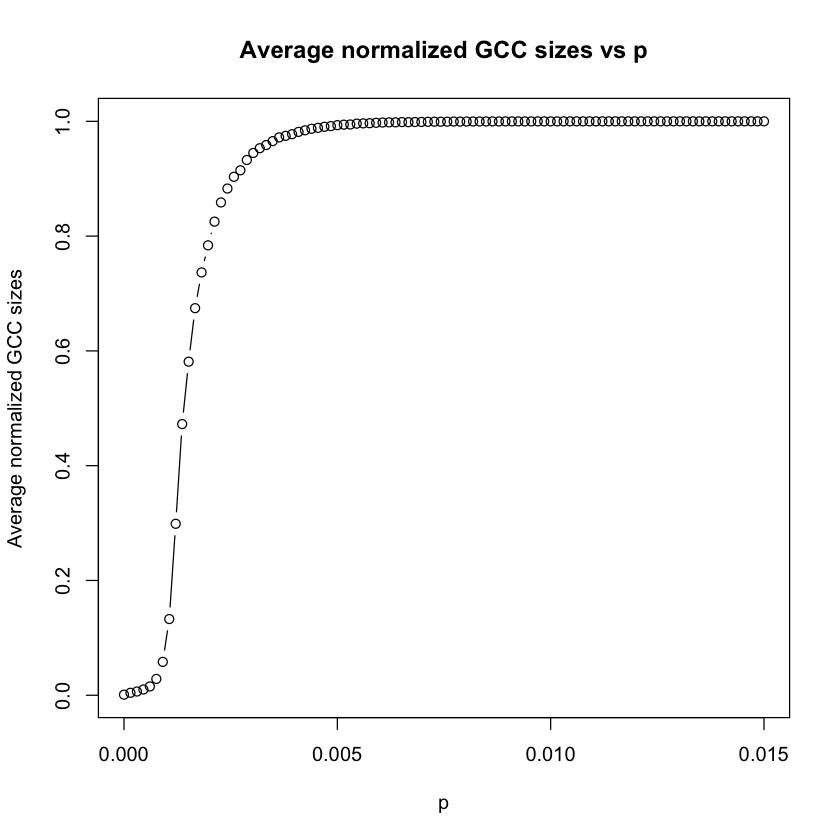

In [180]:
plot(p_seq,avg_norm_gcc,type='b',main="Average normalized GCC sizes vs p",xlab="p",ylab="Average normalized GCC sizes")


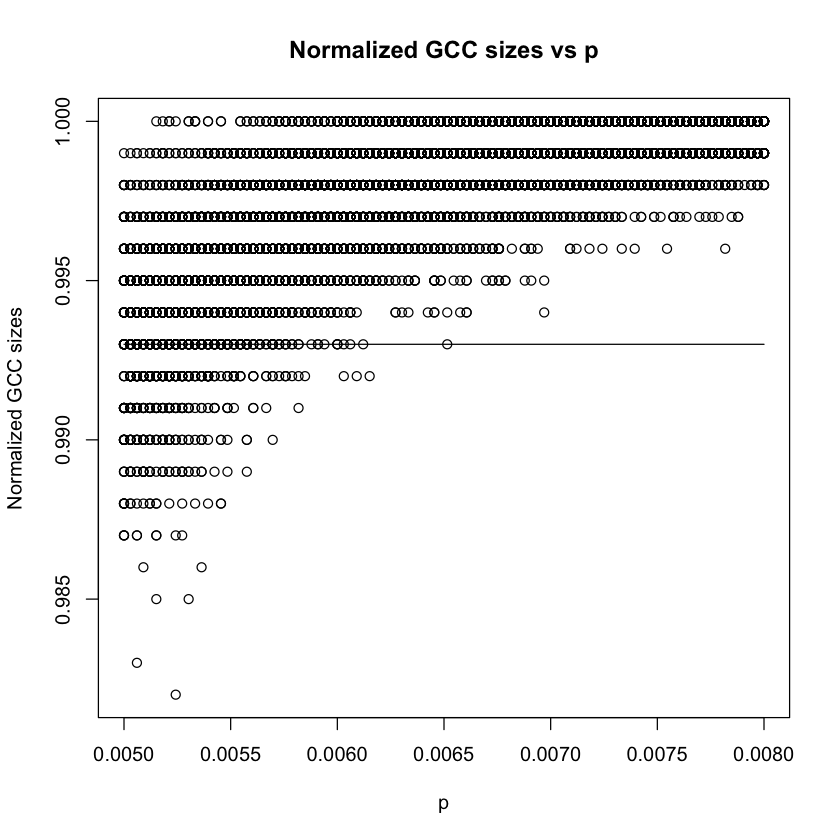

In [217]:
#Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? 
#Do they match with theoretical values mentioned or derived in lectures?
p_seq <- seq(from=0.005,to=0.008,length.out=100)
norm_gcc <- c()
avg_norm_gcc <- c()
for (p in p_seq){
    norm_gcc_p <- c()
    for (i in 1:100){
        g <- erdos.renyi.game(1000, p, directed = F)
        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
        norm_gcc_p <- c(norm_gcc_p,vcount(subg)/vcount(g))
    }
    norm_gcc <- c(norm_gcc,norm_gcc_p)
    avg_norm_gcc <- c(avg_norm_gcc,mean(norm_gcc_p))
}
plot(rep(p_seq,each=100),norm_gcc,type='p',main="Normalized GCC sizes vs p",xlab="p",ylab="Normalized GCC sizes")
lines(p_seq,rep(0.993,each=100))



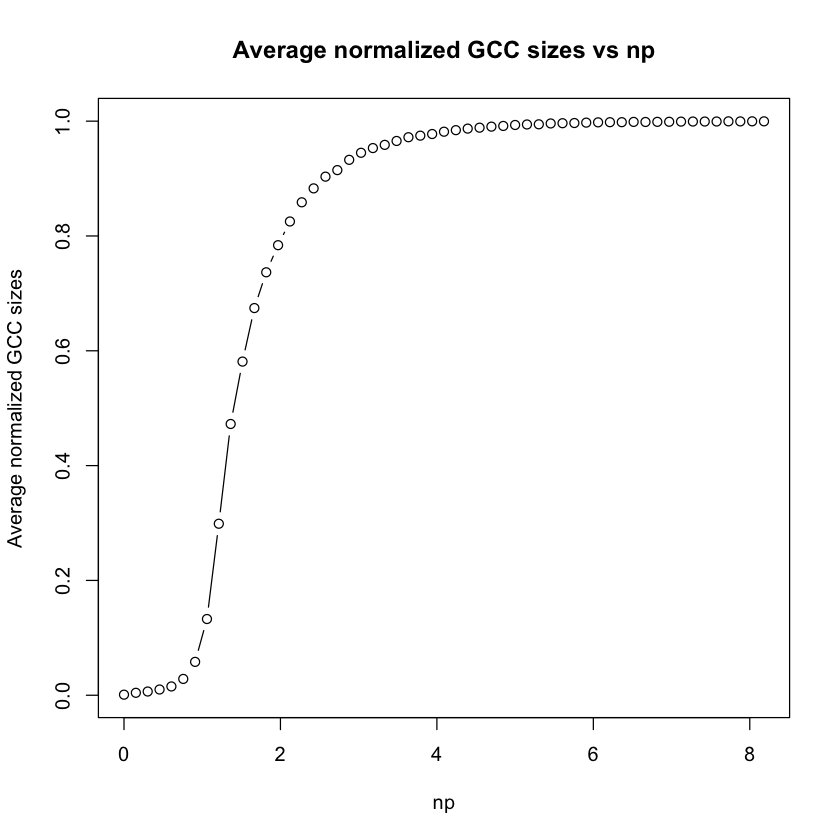

In [185]:
plot(1000*p_seq[1:55],avg_norm_gcc[1:55],type='b',main="Average normalized GCC sizes vs np",xlab="np",ylab="Average normalized GCC sizes")

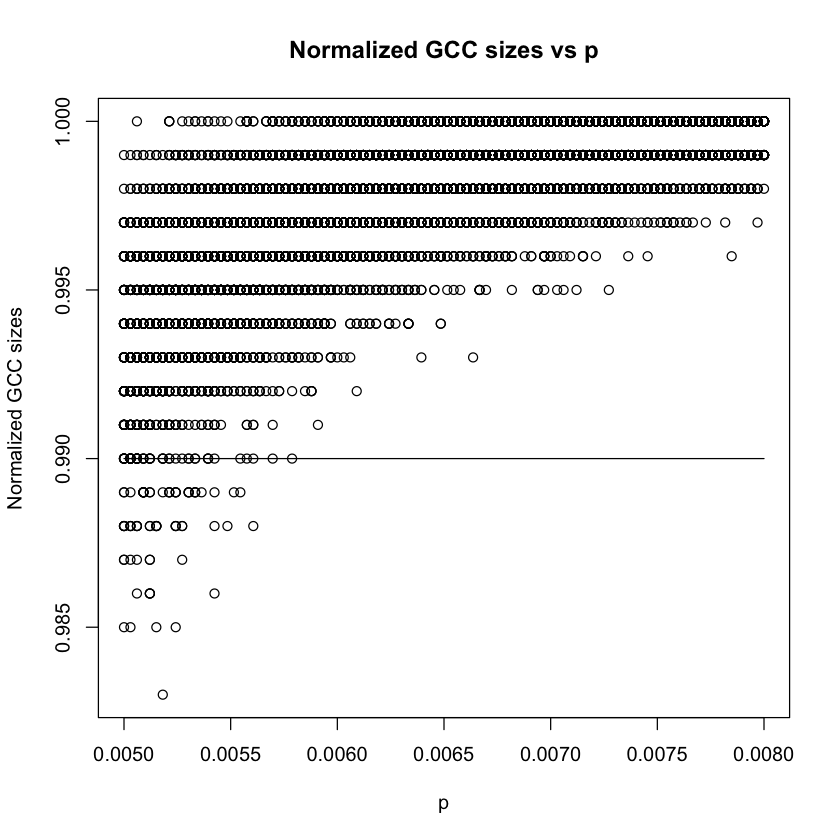

In [186]:
#Empirically estimate the value of p where the giant connected component 
#takes up over 99% of the nodes in almost every experiment.
p_seq <- seq(from=0.005,to=0.008,length.out=100)
norm_gcc <- c()
avg_norm_gcc <- c()
for (p in p_seq){
    norm_gcc_p <- c()
    for (i in 1:100){
        g <- erdos.renyi.game(1000, p, directed = F)
        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
        norm_gcc_p <- c(norm_gcc_p,vcount(subg)/vcount(g))
    }
    norm_gcc <- c(norm_gcc,norm_gcc_p)
    avg_norm_gcc <- c(avg_norm_gcc,mean(norm_gcc_p))
}
plot(rep(p_seq,each=100),norm_gcc,type='p',main="Normalized GCC sizes vs p",xlab="p",ylab="Normalized GCC sizes")
lines(p_seq,rep(0.99,each=100))

#### (d)

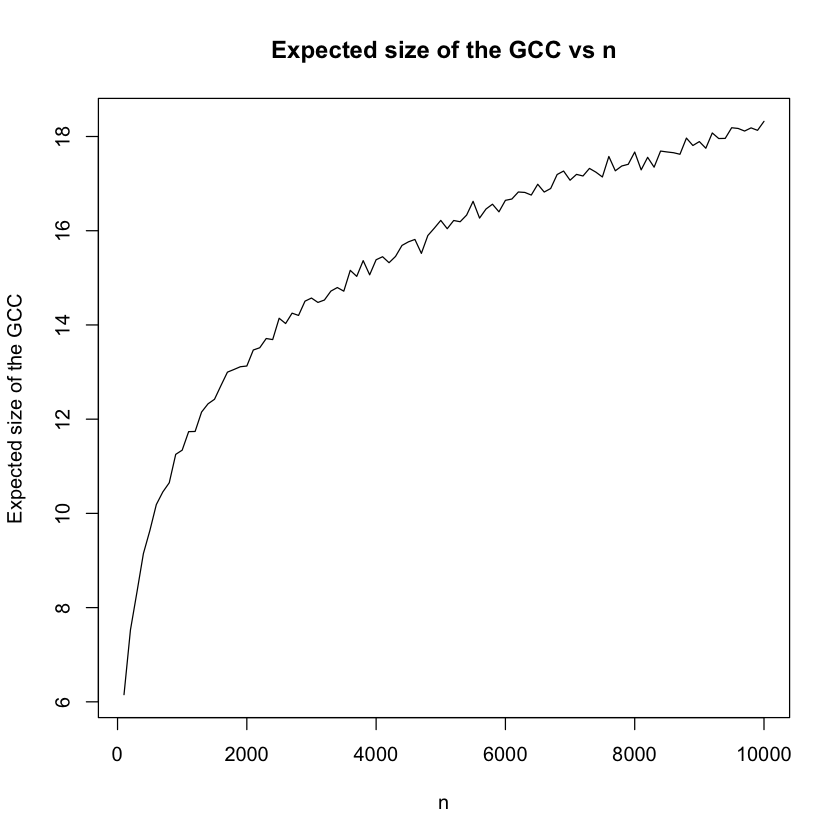

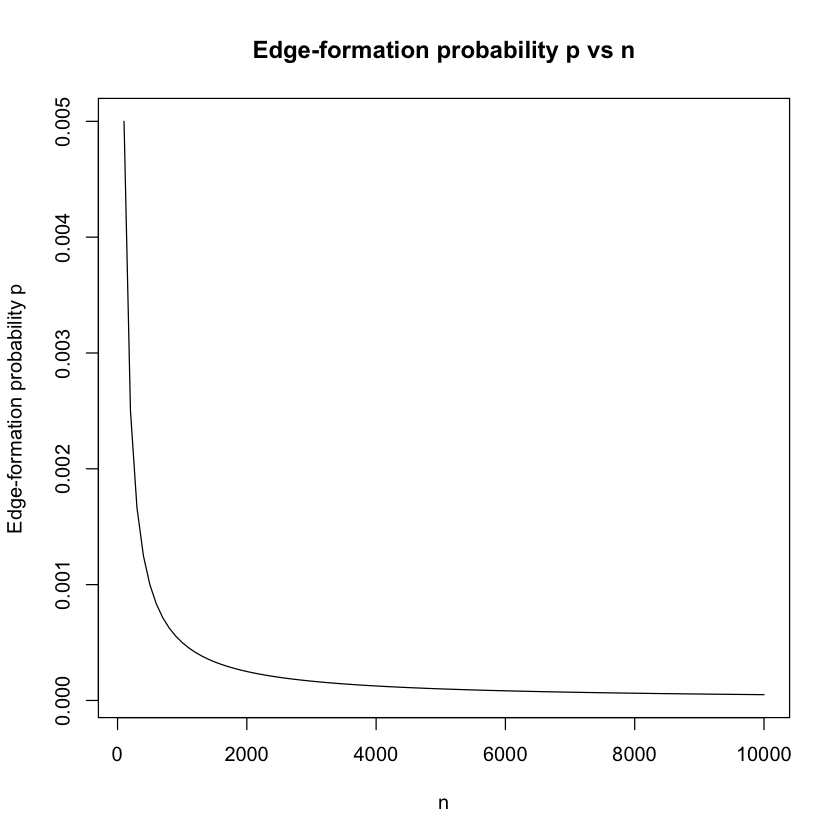

In [78]:
# (i)
c <- 0.5
nodes_seq <- seq(100,10000,100)
exp_gcc_size <- c()
p_seq <- c()
for (n in nodes_seq){
    p <- c/n
    p_seq <- c(p_seq,p)
    gcc_size <- c()
    for (i in 1:1000){
        g <- erdos.renyi.game(n, p, directed = F)
        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
        gcc_size <- c(gcc_size,vcount(subg))
    }
    exp_gcc_size <- c(exp_gcc_size,mean(gcc_size))
}
plot(nodes_seq,exp_gcc_size,type='l',main="Expected size of the GCC vs n",xlab="n",ylab="Expected size of the GCC")
plot(nodes_seq,p_seq,type='l',main="Edge-formation probability p vs n",xlab="n",ylab="Edge-formation probability p")

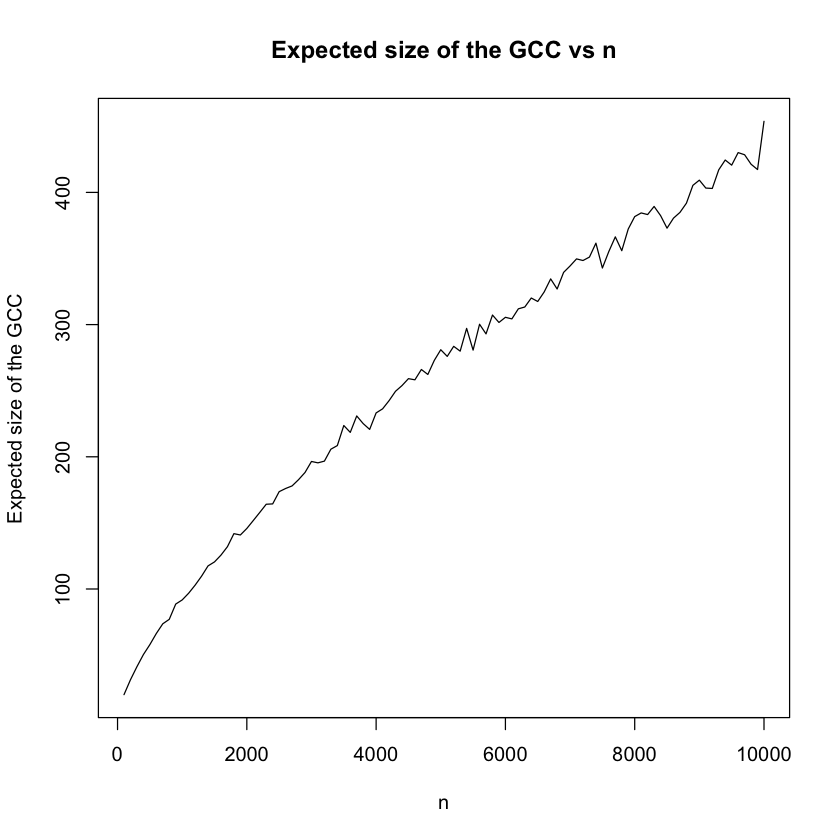

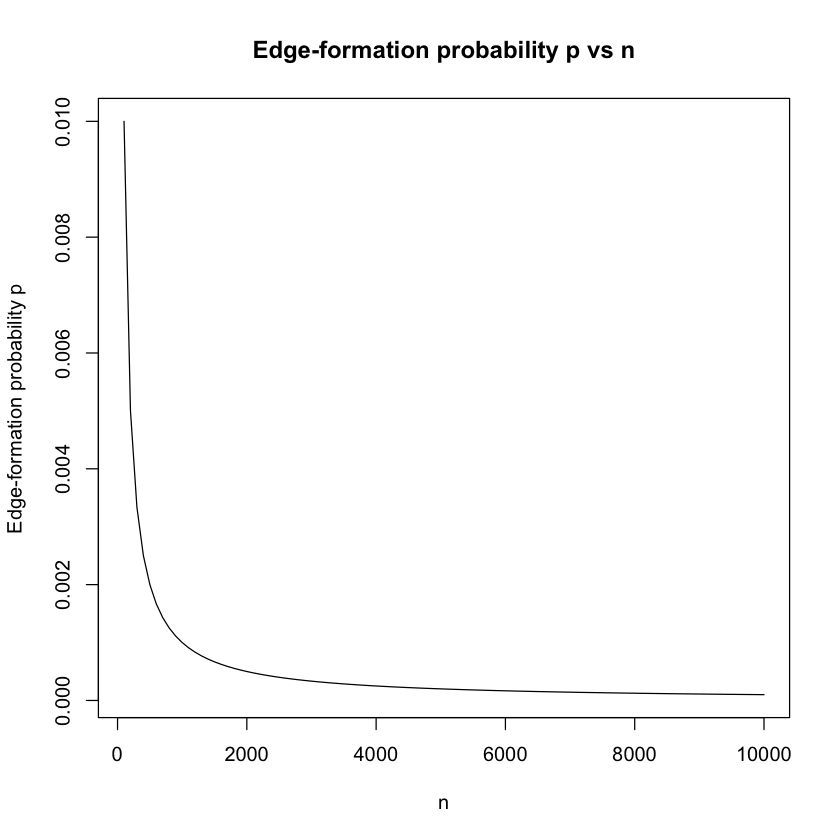

In [79]:
# (ii)
c <- 1
nodes_seq <- seq(100,10000,100)
exp_gcc_size <- c()
p_seq <- c()
for (n in nodes_seq){
    p <- c/n
    p_seq <- c(p_seq,p)
    gcc_size <- c()
    for (i in 1:1000){
        g <- erdos.renyi.game(n, p, directed = F)
        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
        gcc_size <- c(gcc_size,vcount(subg))
    }
    exp_gcc_size <- c(exp_gcc_size,mean(gcc_size))
}
plot(nodes_seq,exp_gcc_size,type='l',main="Expected size of the GCC vs n",xlab="n",ylab="Expected size of the GCC")
plot(nodes_seq,p_seq,type='l',main="Edge-formation probability p vs n",xlab="n",ylab="Edge-formation probability p")

In [66]:
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

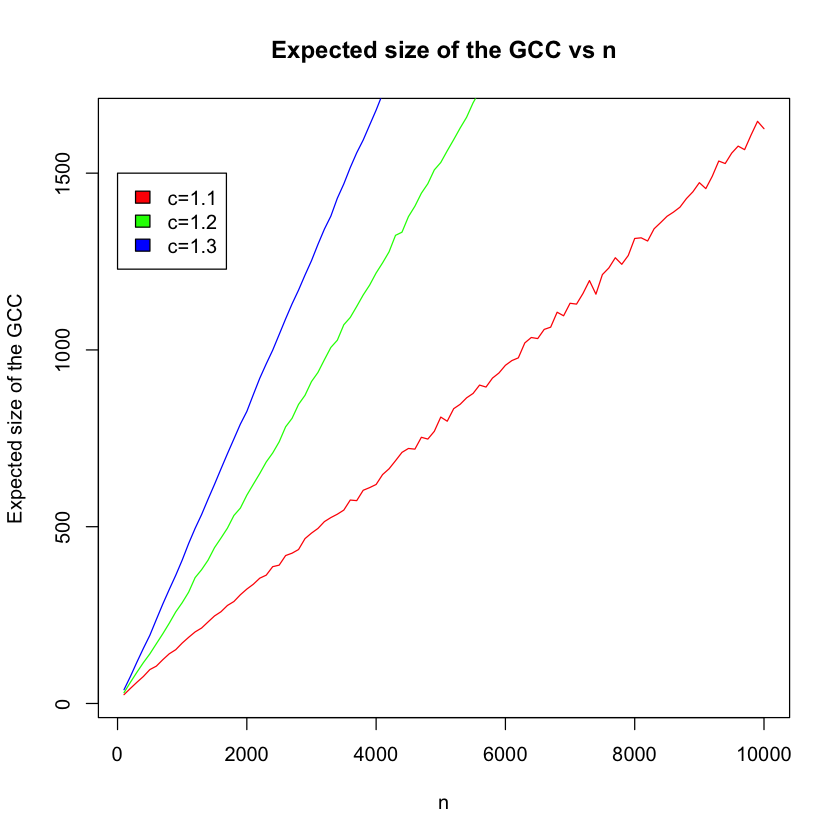

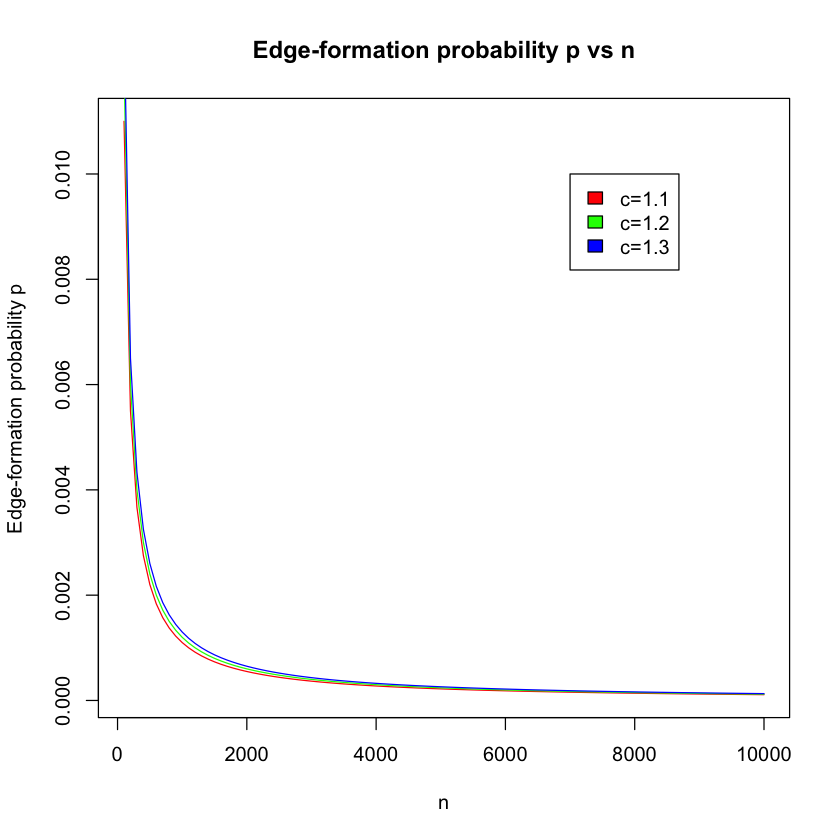

In [80]:
# (iii)
c_3 <- c(1.1,1.2,1.3)
exp_gcc_size_3 <- list()
p_seq_3 <- list()
nodes_seq <- seq(100,10000,100)
for (c in c_3){
    exp_gcc_size <- c()
    p_seq <- c()
    for (n in nodes_seq){
        p <- c/n
        p_seq <- c(p_seq,p)
        gcc_size <- c()
        for (i in 1:1000){
            g <- erdos.renyi.game(n, p, directed = F)
            subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
            gcc_size <- c(gcc_size,vcount(subg))
        }
        exp_gcc_size <- c(exp_gcc_size,mean(gcc_size))
    }
    exp_gcc_size_3[[which(c_3==c)]] <- exp_gcc_size
    p_seq_3[[which(c_3==c)]] <- p_seq
}
    #nodes_seq <- seq(100,10000,100)
    #exp_gcc_size <- c()
    #p_seq <- c()
    #for (n in nodes_seq){
    #    p <- c/n
    #    p_seq <- c(p_seq,p)
    #    gcc_size <- c()
    #    for (i in 1:1000){
    #        g <- erdos.renyi.game(n, p, directed = F)
    #        subg <- induced_subgraph(g,which(components(g)$membership == which.max(components(g)$csize)))
    #        gcc_size <- c(gcc_size,vcount(subg))
    #    }
    #    exp_gcc_size <- c(exp_gcc_size,mean(gcc_size))
    #}
plot(nodes_seq,exp_gcc_size_3[[1]],type='l',main="Expected size of the GCC vs n",xlab="n",ylab="Expected size of the GCC",col='red')
lines(nodes_seq,exp_gcc_size_3[[2]],col='green')
lines(nodes_seq,exp_gcc_size_3[[3]],col='blue')
legend(x=0,y=1500,legend=c('c=1.1','c=1.2','c=1.3'),fill=c('red','green','blue'))
plot(nodes_seq,p_seq_3[[1]],type='l',main="Edge-formation probability p vs n",xlab="n",ylab="Edge-formation probability p",col='red')
lines(nodes_seq,p_seq_3[[2]],col='green')
lines(nodes_seq,p_seq_3[[3]],col='blue')
legend(x=7000,y=0.010,legend=c('c=1.1','c=1.2','c=1.3'),fill=c('red','green','blue'))


(iv) See the report

### Question 2: Create networks using preferential attachment model

#### (a)

In [187]:
g_1000 <- barabasi.game(1000, m=1, directed=F);
is.connected(g_1000)

[1] TRUE

#### (b)

IGRAPH clustering fast greedy, groups: 34, mod: 0.93
+ groups:
  $`1`
   [1]   2  39  65 114 134 158 161 162 170 176 180 185 212 220 259 272 274 334
  [19] 344 347 357 379 397 432 436 455 462 475 482 483 502 524 532 544 553 555
  [37] 560 580 607 628 629 638 685 697 704 716 737 747 763 771 801 819 845 861
  [55] 863 872 929 956 963 989 990
  
  $`2`
   [1]  38  56  93  96 102 115 138 141 210 251 270 277 293 308 309 327 360 371
  [19] 376 414 429 447 460 466 510 519 554 582 624 635 659 680 732 798 802 864
  [37] 893 939 944 955 957 958 968 978
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 34
 The modularity score of this partitioning is: 0.932141851561274

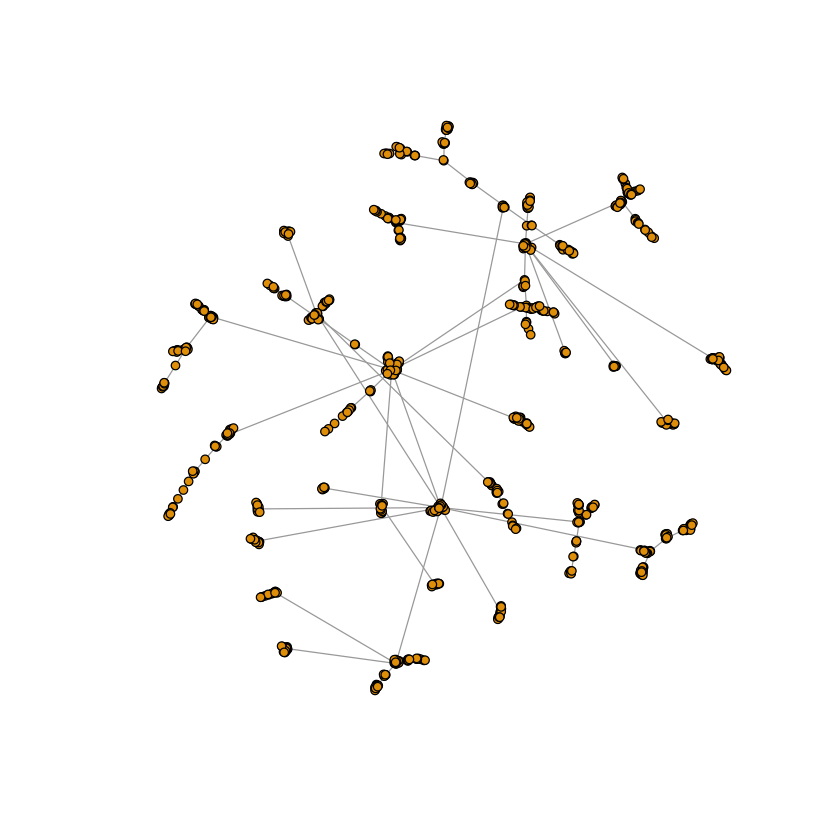

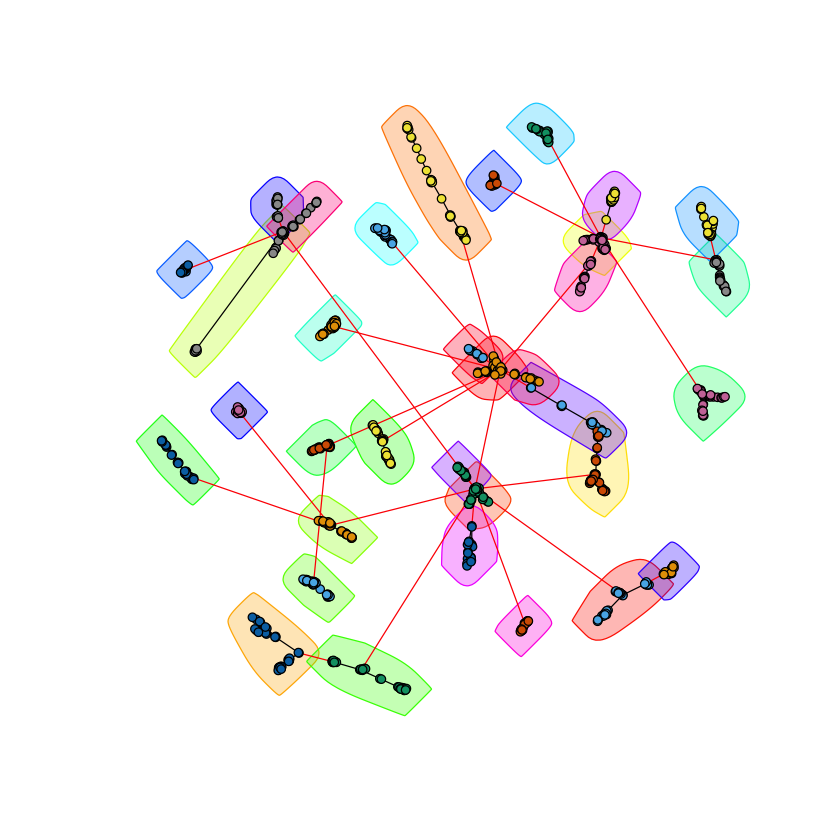

In [188]:
g_1000_comstr <- cluster_fast_greedy(g_1000)
print(g_1000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_1000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_1000_comstr)))
plot(g_1000,vertex.size=3,vertex.label=NA)
plot(g_1000_comstr, g_1000, vertex.size=3, vertex.label=NA)

#### (c)

IGRAPH clustering fast greedy, groups: 114, mod: 0.98
+ groups:
  $`1`
    [1]   57  113  120  206  212  266  320  460  488  540  718  804 1012 1015
   [15] 1134 1181 1216 1328 1381 1538 1595 1597 1617 1643 1645 1741 1746 1764
   [29] 1770 2277 2296 2327 2374 2375 2395 2636 2687 2820 2904 2967 2994 2998
   [43] 3166 3243 3274 3302 3364 3436 3692 3781 3782 3812 3863 3949 3953 3967
   [57] 3999 4028 4075 4090 4359 4431 4676 4679 4769 4913 4944 4998 5026 5296
   [71] 5371 5444 5502 5513 5623 5656 5709 5715 5746 6060 6208 6222 6282 6321
   [85] 6348 6350 6437 6499 6542 6550 6586 6596 6649 6681 6710 6712 6795 6882
   [99] 7044 7174 7312 7350 7354 7372 7534 7652 7697 7728 7790 7793 7952 8024
  [113] 8196 8274 8315 8412 8429 8456 8533 8563 8592 8753 8850 8937 9046 9059
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 114
 The modularity score of this partitioning is: 0.977841833588311

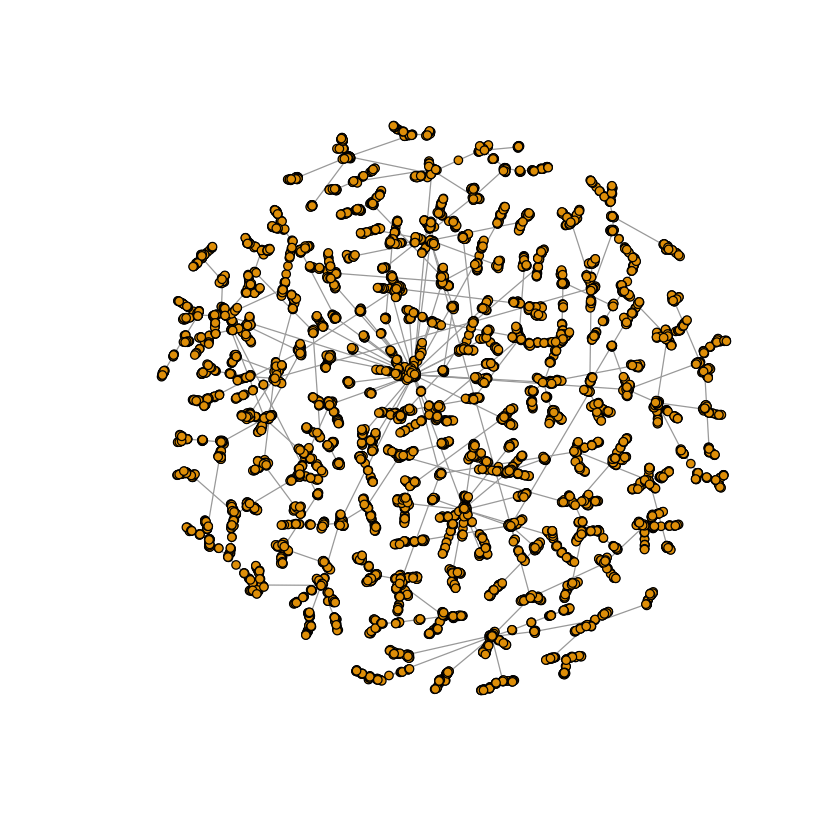

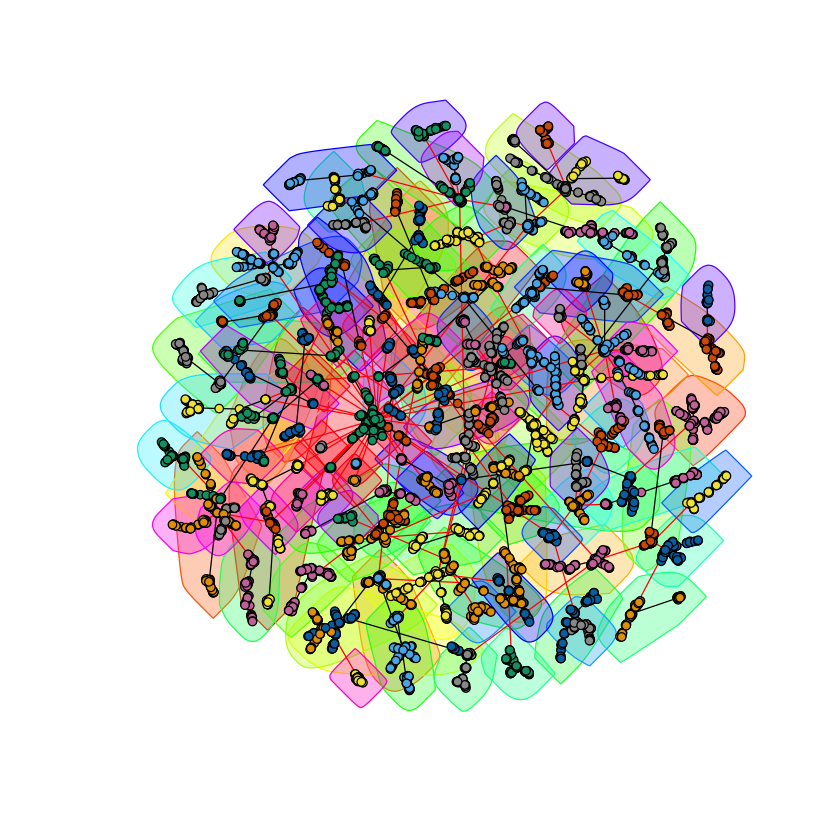

In [166]:
g_10000 <- barabasi.game(10000, m=1, directed=F);
g_10000_comstr <- cluster_fast_greedy(g_10000)
print(g_10000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_10000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_10000_comstr)))
plot(g_10000,vertex.size=3,vertex.label=NA)
plot(g_10000_comstr, g_10000, vertex.size=3, vertex.label=NA)